<h2>Introduction</h2> Researchers at UBC led by Frank Wood collected data about how people play video games by setting up MineCraft servers and recording various types of data. One of their goals was to determine which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

In this proposal, we will focus on the specific question: 

<em>Which set of variables is more predictive of subscription: Player Characteristics (age and gender) or Player Behaviors (total game sessions and average length of gaming sessions)?</em>

<h2>Dataset Descriptions</h2> For this inquiry, we will be combining 2 datasets: <br>
    <ul>
    <li>player.csv  -> data about each unique player</li>
	<li>sessions.csv  -> data on individual player gaming sessions</li>
</ul>

<h4>player.csv Description</h4 

players.csv contains 196 unique player data collected through self-reported survey and records or players actions.

| Variable Name    | Data Type | Meaning |
| -------- | ------- |---------|
| experience  | chr   |     Player’s self reported skill level    |
| subscribe | lgl     |Whether or not Player subscribed to newsletter  |
| hashedEmail    | chr    | Anonymous and Unique Player ID | 
| played_hours  | dbl    |Total cumulative Hours played |
| name | chr     | Player’s name |
| gender    | chr    | Player’s self reporter gender  |
| Age  | dbl    |  Players age in years  | 

Issues: <br>
    <ul>
    <li>Missing Values: 2 missing age values</li>
	<li>Inherit Self-Reported Bias</li>
</ul>

<h4>sessions.csv Description</h4 

sessions.csv contains 1535 records of each single game session and ID of which player it belongs to. Collected through recording player playtimes. 

| Variable Name    | Data Type | Meaning |
| -------- | ------- |---------|
| hashedEmail  | chr   |     Anonymous and Unique Player ID    |
| start_time | chr    |Timestamp for start of session  |
| end_time    | chr    | Timestamp for end of session | 
| original_start_time  | dbl    |Unix timestamp for session start |
| original_end_time | dbl     | Unix timestamp for session end |


Issues: <br>
    <ul>
    <li>Missing Values: 2 missing end_time values</li>
	<li>Data is not tidy - multipe entries for single player</li> 
    <li>Nonparticipating Players: 125/196 (64%) players actually played</li>
</ul>

<h4>Summary Statistics</h4 
<br>
    <ul>
    <li>Subscription Rate: 74.47% (144/196)  </li>
	<li>Mean played_hours 5.85 </li> 
    <li>played_hours Range: 0-223.1</li> 
    <li>Mean age: 21.14 </li>
	<li>Age Range: 9-58 </li> 
    <li>Average Sessions per active players: 12.28 </li> 
    <li>Average Sessions per total registered players: 7.83  </li>
</ul>

<h2>Exploratory Data Analysis and Visualization</h2>We will begin by loading the needed packages into R 

In [1]:
library(tidyverse)
library(lubridate) #Needed for tiding the sessions.csv dataset later

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now load player.csv. It requires a little bit of tidying: getting rid of the N/A values previously mentioned

In [2]:
players <- read_csv("players.csv") |> 
        drop_na()
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


<h4>Mean Values of player.csv</h4 <br> 

| Variable | Mean Value | 
| -------- | ------- |
| player_hours  | 8.85   | 
| Age | 21.14   |

Now we will load sessions.csv. However, sessions.csv requires tidying since there are multiple entries/rows for an individual player

In [3]:
sessions <- read_csv("sessions.csv") |> 
    select(-original_start_time, -original_end_time) |> #unessecary data which does not help us
    mutate(start_time = dmy_hm(start_time), #using the lubridate package to turn the format of the data into something workable
           end_time = dmy_hm(end_time)
  ) |>

mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins"))) |> 

 group_by(hashedEmail) |>
  summarise(total_sessions = n(), avg_session_time_mins = mean(session_length, na.rm = TRUE)
  )

sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,total_sessions,avg_session_time_mins
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,53.000000
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,30.000000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,11.000000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,32.153846
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,35.000000
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,10.000000
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1,50.000000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41,29.682927
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1,18.000000


Now that we have both datasets and they are tidy, we can combine them to create our final dataset!

In [4]:
final_data <- left_join(players, sessions) |> 

mutate(across(everything(), ~ replace_na(.x, 0))) #the N/A values originally are needed and cannot be ommited

final_data

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions,avg_session_time_mins
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,74.77778
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,85.00000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,5.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,50.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,9.00000
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,0.00000
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,0.00000
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,5.00000
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,1,13.00000


Now we will create a few visualizations which will allow us to better understand our data

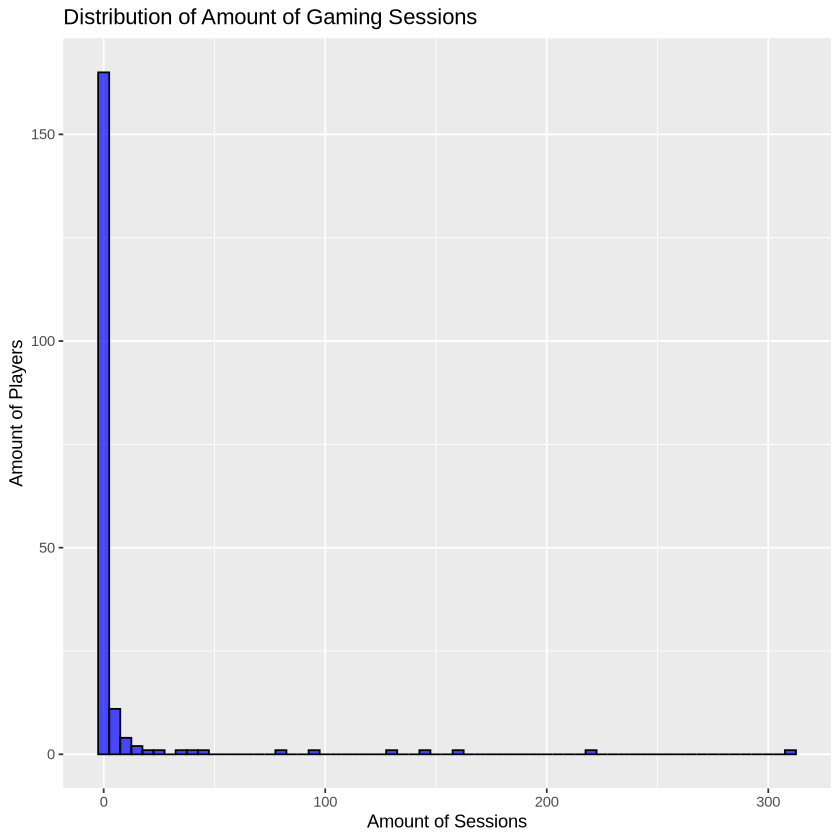

In [5]:
ggplot(final_data, aes(x = total_sessions)) +
  geom_histogram(
    binwidth = 5,      
    fill = "blue",          
    color = "black",         
    alpha = 0.7           
  ) +
  labs(
    title = "Distribution of Amount of Gaming Sessions",       
    x = "Amount of Sessions",         
    y = "Amount of Players"            
  ) 

In this histogram, we can see the distribution of the amount of gaming sessions each player had over the course of the research. We can see how almostall players had few total gaming sessions and only a very select few had more than ~50 sessions  

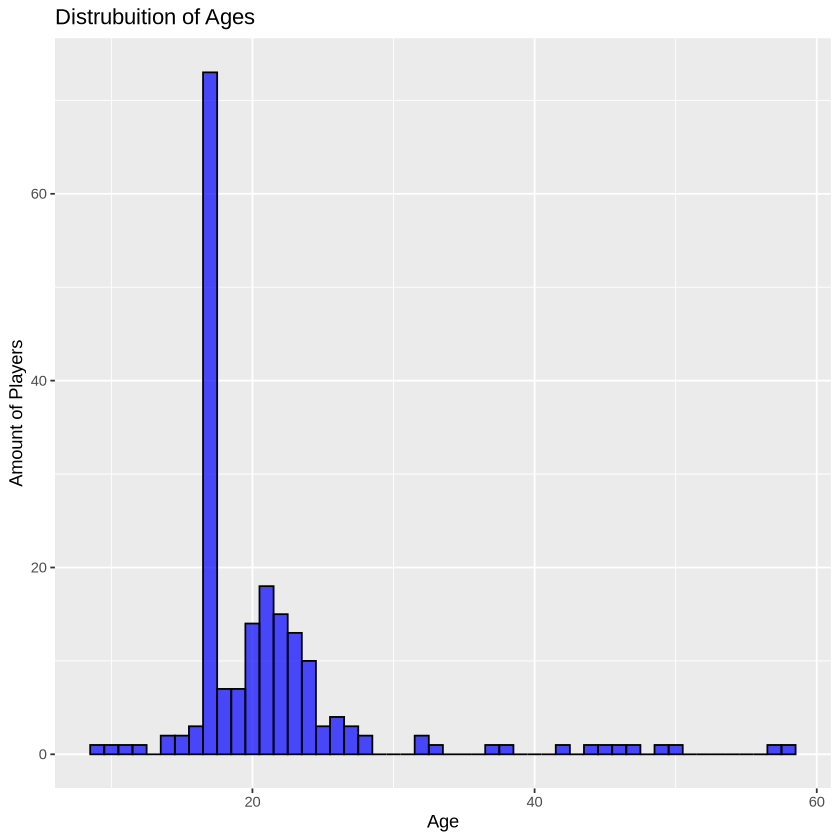

In [6]:
ggplot(final_data, aes(x = Age)) +
  geom_histogram(
    binwidth = 1,      
    fill = "blue",          
    color = "black",         
    alpha = 0.7         
  ) +
  labs(
    title = "Distrubuition of Ages",     
    x = "Age",           
    y = "Amount of Players"          
  ) 

From this histogram showing the distribution of ages throughout the players, we can see some trends. Most noteably being the enormous spike at 17 years old. This is important for our questions because it will prove to skew our predictor involving age since a very large majority of players are 17 years old.

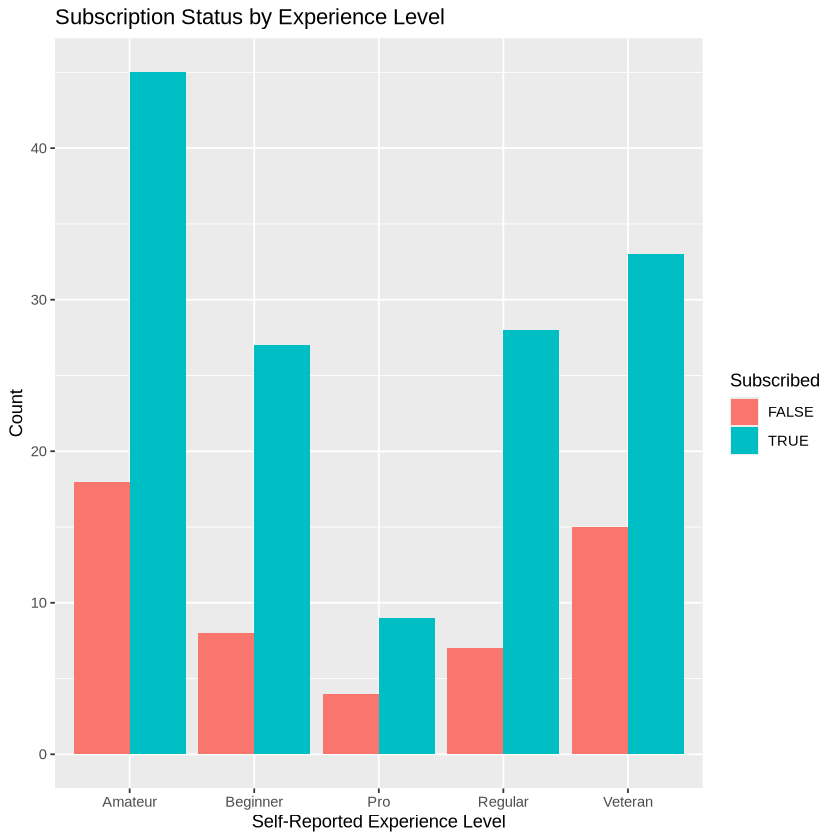

In [7]:
ggplot(final_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +   
  labs(
    title = "Subscription Status by Experience Level",
    x = "Self-Reported Experience Level",
    y = "Count",
    fill = "Subscribed"
  ) 

From this double bar graph, we are able to see individuals who subscribed versus those who didn't grouped by their Self Reported skill Level. This shows us that the most players regardless of skill level subscribed to the news letter. It also shows us that most players are Self Reported Amateurs.

<h2>Methods and Plan</h2> Question Restated: Which set of variables is more predictive of subscription: Player Characteristics (age and gender) or Player Behaviors (total game sessions and average length of gaming sessions) <br>
<br>
To do this, we will create 2 separate Classification Models both predicting subscription with different predictors, one predicting based on Player Characteristics and one based on Playter Behaviours. Then by using 10-fold cross-validation, we will be able determine the performance metrics of each model and will be able to compare the two and decide the better one. We would split the data in both models into 80% training and 20% testing before a 10-fold cross-validation on the training set. This method is appropriate because cross-validation provides out-of-sample performance estimates which allow for fair comparison. The model with a higher performance metrics will be considered the most predictive. <br>
<br>
Some potential issues with this method is the sample size and class imbalance. These might affect our accuracy of both models as they might not be able to capture the seemingly complex and arbitrary patterns of certain variables. 
